## Context

## Scope

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns
import plotly.express as px
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor

In [17]:
bot = pd.read_csv('/Users/simarmalhan/Downloads/archive (5)/bottle.csv')
cast = pd.read_csv('/Users/simarmalhan/Downloads/archive (5)/cast.csv')

/var/folders/05/073klxvx53gb5wt5h1z7h8ph0000gn/T/ipykernel_35026/4294542622.py:1: DtypeWarning: Columns (47,73) have mixed types. Specify dtype option on import or set low_memory=False.
  bot = pd.read_csv('/Users/simarmalhan/Downloads/archive (5)/bottle.csv')
/var/folders/05/073klxvx53gb5wt5h1z7h8ph0000gn/T/ipykernel_35026/4294542622.py:2: DtypeWarning: Columns (40,41,44,45,46,47) have mixed types. Specify dtype option on import or set low_memory=False.
  cast = pd.read_csv('/Users/simarmalhan/Downloads/archive (5)/cast.csv')


In [18]:
bot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 864863 entries, 0 to 864862
Data columns (total 74 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Cst_Cnt              864863 non-null  int64  
 1   Btl_Cnt              864863 non-null  int64  
 2   Sta_ID               864863 non-null  object 
 3   Depth_ID             864863 non-null  object 
 4   Depthm               864863 non-null  int64  
 5   T_degC               853900 non-null  float64
 6   Salnty               817509 non-null  float64
 7   O2ml_L               696201 non-null  float64
 8   STheta               812174 non-null  float64
 9   O2Sat                661274 non-null  float64
 10  Oxy_µmol/Kg          661268 non-null  float64
 11  BtlNum               118667 non-null  float64
 12  RecInd               864863 non-null  int64  
 13  T_prec               853900 non-null  float64
 14  T_qual               23127 non-null   float64
 15  S_prec           

In [19]:
bottle = bot.iloc[:,[0,4,5,6,7,8]]
bottle

,Cst_Cnt,Depthm,T_degC,Salnty,O2ml_L,STheta
0,1,0,10.500,33.4400,NaN,25.64900
1,1,8,10.460,33.4400,NaN,25.65600
2,1,10,10.460,33.4370,NaN,25.65400
3,1,19,10.450,33.4200,NaN,25.64300
4,1,20,10.450,33.4210,NaN,25.64300
...,...,...,...,...,...,...
864858,34404,0,18.744,33.4083,5.805,23.87055
864859,34404,2,18.744,33.4083,5.805,23.87072
864860,34404,5,18.692,33.4150,5.796,23.88911
864861,34404,10,18.161,33.4062,5.816,24.01426


In [20]:
bottle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 864863 entries, 0 to 864862
Data columns (total 6 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   Cst_Cnt  864863 non-null  int64  
 1   Depthm   864863 non-null  int64  
 2   T_degC   853900 non-null  float64
 3   Salnty   817509 non-null  float64
 4   O2ml_L   696201 non-null  float64
 5   STheta   812174 non-null  float64
dtypes: float64(4), int64(2)
memory usage: 39.6 MB


### NaN values Visualization

<Axes: >

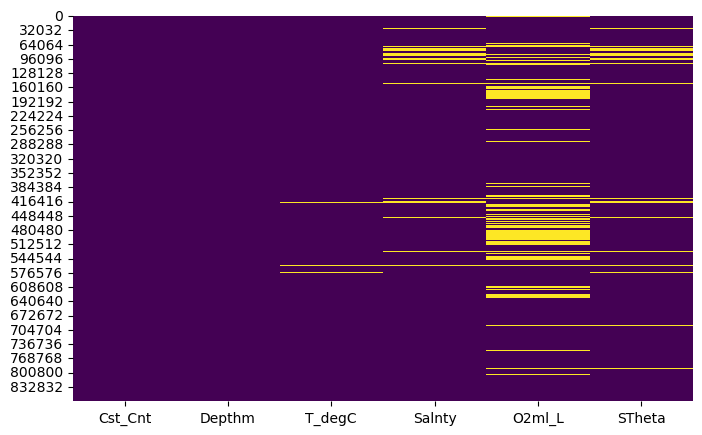

In [21]:
plt.figure(figsize = (8,5))
sns.heatmap(bottle.isna(), cbar = False, cmap = 'viridis')

### Data Cleaning

In [22]:
columns = bottle.columns

for column in columns:
    bottle = bottle[~bottle[column].isnull()]

<Axes: >

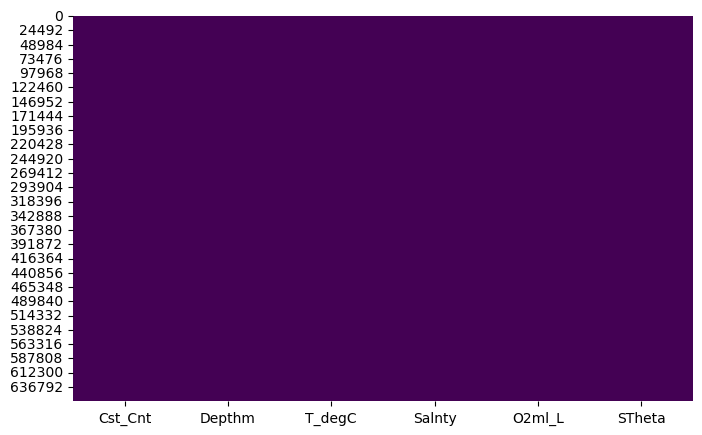

In [23]:
bottle = bottle.reset_index(drop = True)
plt.figure(figsize = (8,5))
sns.heatmap(bottle.isna(), cbar = False, cmap = 'viridis')

### Correlation Matrix

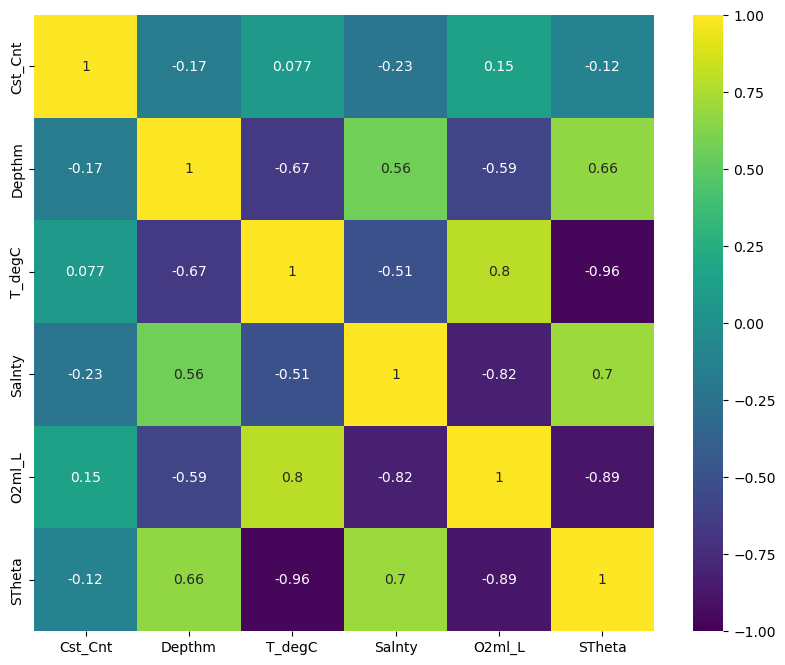

In [25]:
# Calculate the correlation matrix
corr_matrix = bottle.corr(numeric_only = True)

# Plot the heatmap
plt.figure(figsize = (10, 8))
sns.heatmap(corr_matrix, annot = True, cmap = 'viridis', vmin = -1, vmax = 1)
plt.show()

*The Pearson's Coefficient is not too high between Temperature and Salinity, at -0.51*

### Feature Plots
#### Plot pairwise relationships in the datasets

/Users/simarmalhan/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


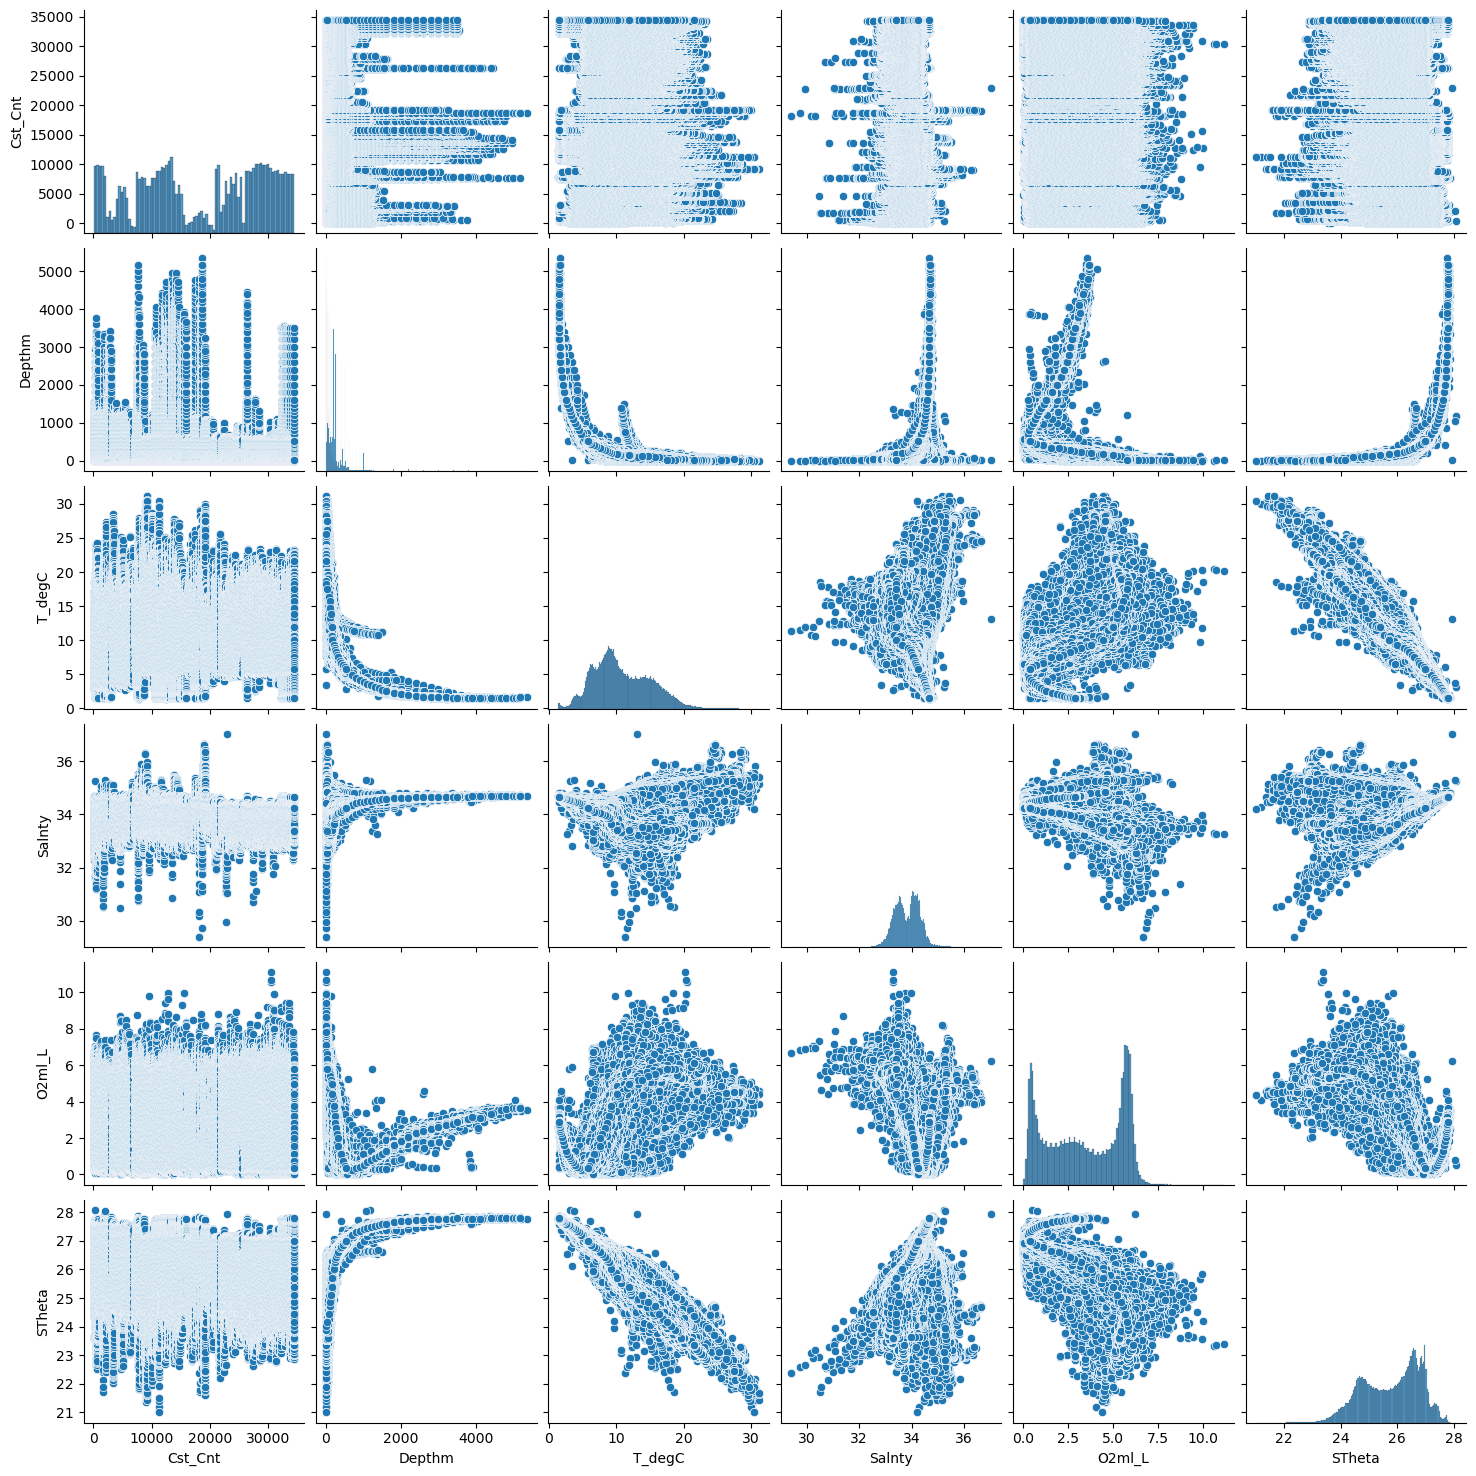

In [26]:
sns.pairplot(bottle)

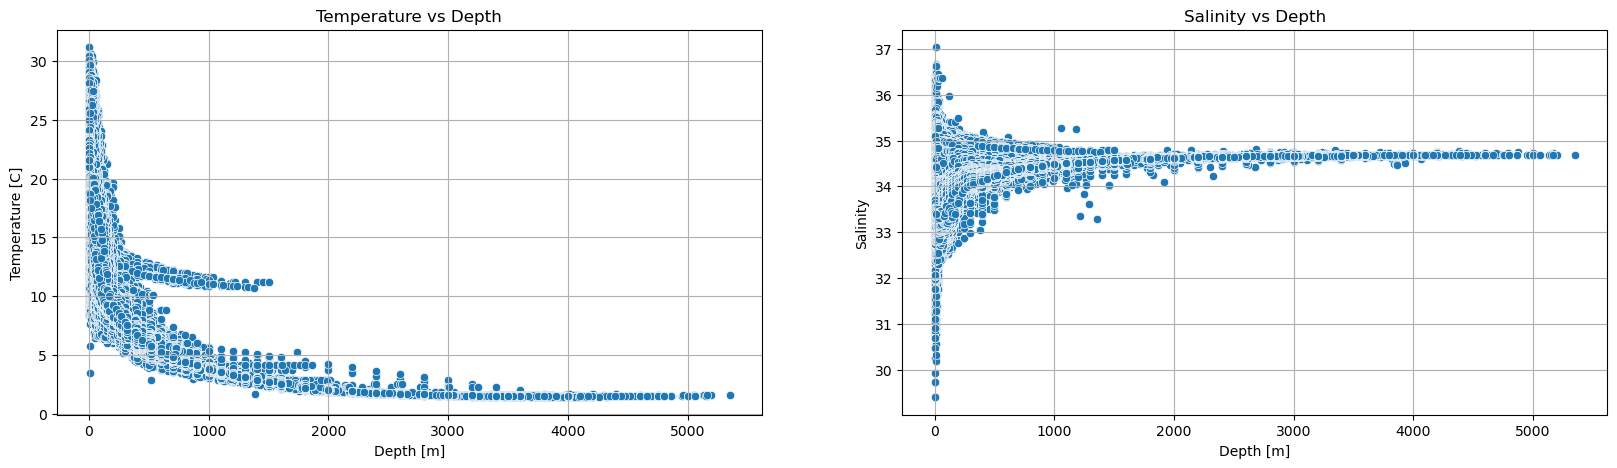

In [27]:
fig, ax = plt.subplots(1, 2, figsize = (20, 5))
g1 = sns.scatterplot(data = bottle, x = 'Depthm', y = 'T_degC', ax = ax[0])
ax[0].set(xlabel = 'Depth [m]', ylabel = 'Temperature [C]', title = 'Temperature vs Depth')
ax[0].grid()

g1 = sns.scatterplot(data = bottle, x = 'Depthm', y = 'Salnty', ax = ax[1])
ax[1].set(xlabel = 'Depth [m]', ylabel = 'Salinity', title = 'Salinity vs Depth')
ax[1].grid()

*Something unusual is happening at Depth 1000 - the usual temperature at such depth is 5 degrees. Also, the salinity at this depth is showing some critical change*

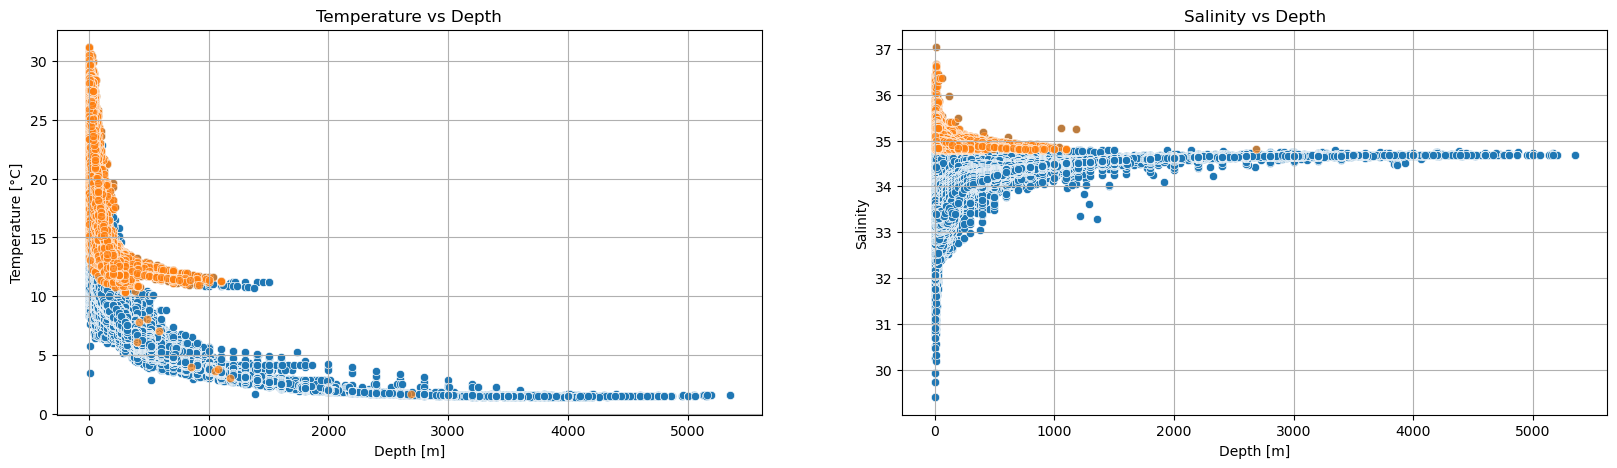

In [33]:
fig, ax = plt.subplots(1,2, figsize=(20,5))
bottle_filter=bottle[(bottle['Salnty']>34.8)&(bottle['Salnty']<38)]

g1=sns.scatterplot(data=bottle,x='Depthm',y='T_degC',ax=ax[0])
g1=sns.scatterplot(data=bottle_filter,x='Depthm',y='T_degC',ax=ax[0],legend=None,alpha=0.7)
ax[0].set(xlabel='Depth [m]',ylabel='Temperature [°C]',title='Temperature vs Depth')
ax[0].grid()

g2=sns.scatterplot(data=bottle,x='Depthm',y='Salnty',ax=ax[1])
g2=sns.scatterplot(data=bottle_filter,x='Depthm',y='Salnty',ax=ax[1],alpha=0.7)
ax[1].set(xlabel='Depth [m]',ylabel='Salinity',title='Salinity vs Depth')
ax[1].grid()

### Salinity - Temperature

<Axes: xlabel='Salnty', ylabel='T_degC'>

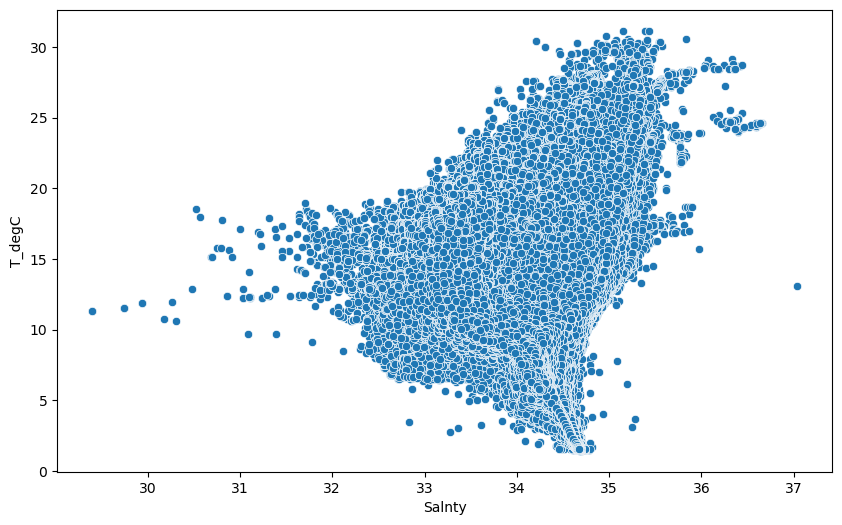

In [37]:
plt.figure(figsize = (10, 6))

sns.scatterplot(bottle, x = 'Salnty', y = 'T_degC')

*Salinity and Temperature don't seem to have a strong relationship.*

## Predictive Models

In [40]:
# Split

bottle_train, bottle_test = train_test_split(bottle, test_size = 0.2, random_state = 1234)
print('bottle_train: ', bottle_train.shape)
print('bottle_train: ', bottle_test.shape, '\n')

# Features = ['Salnty', 'STheta']

features = bottle.columns.drop('T_degC').tolist()
target = 'T_degC'

X_train = bottle_train[features].values
y_train = bottle_train[target].values
X_test = bottle_test[features].values
y_test = bottle_test[target].values

bottle_train:  (529014, 6)
bottle_train:  (132254, 6) 



### Linear Regression
#### Temperature from Salinity

In [41]:
features1 = ['Salnty'] # only using the Salinity feature
X_train1 = bottle_train[features1].values
y_train1 = bottle_train[target].values
X_test1 = bottle_test[features1].values
y_test1 = bottle_test[target].values

# creating linear regression model

model = LinearRegression()
model.fit(X_train1, y_train1)
y_predict1 = model.predict(X_test1)

#### Linear Regression Error

In [42]:
print(model)
mse_lin = mean_squared_error(y_test1, y_predict1)
RMSE_lin = mse_lin**(1/2.0)

print('RMSE_lin: ', RMSE_lin)

LinearRegression()
RMSE_lin:  3.6326596110432905


#### Linear Regression Plot

[Text(0.5, 0, 'Salnty'),
 Text(0, 0.5, 'Temperature'),
 Text(0.5, 1.0, 'Linear Regression')]

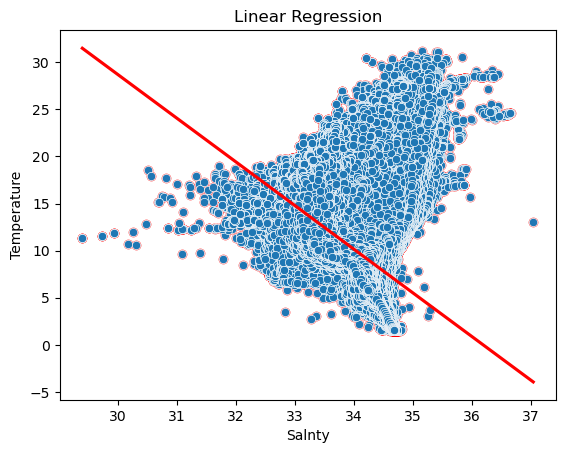

In [44]:
g2 = sns.regplot(bottle, x = 'Salnty', y = 'T_degC', color = 'red')
sns.scatterplot(bottle, x = 'Salnty', y = 'T_degC')
g2.set(xlabel = 'Salnty', ylabel = 'Temperature', title = 'Linear Regression')

## Multiple Linear Regression

In [45]:
model = LinearRegression()
model.fit(X_train, y_train)
print(model)
y_predict2 = model.predict(X_test)

mse_multilin = mean_squared_error(y_test, y_predict2)
RMSE_multilin = mse_multilin**(1/2.0)

print('RMSE_multilin: ', RMSE_multilin)

LinearRegression()
RMSE_multilin:  0.33236019664537975


*Much better* 

## Regression Tree

In [46]:
model_tree = DecisionTreeRegressor(random_state = 44, max_depth = 10)
model_tree.fit(X_train, y_train)
predictions = model_tree.predict(X_test)

[Text(0.5, 0.875, 'STheta <= 25.444\nsquared_error = 17.87\nsamples = 529014\nvalue = 10.915'),
 Text(0.25, 0.625, 'STheta <= 24.557\nsquared_error = 7.377\nsamples = 197683\nvalue = 15.356'),
 Text(0.125, 0.375, 'STheta <= 23.836\nsquared_error = 5.511\nsamples = 69088\nvalue = 17.938'),
 Text(0.0625, 0.125, '\n  (...)  \n'),
 Text(0.1875, 0.125, '\n  (...)  \n'),
 Text(0.375, 0.375, 'STheta <= 24.968\nsquared_error = 2.876\nsamples = 128595\nvalue = 13.969'),
 Text(0.3125, 0.125, '\n  (...)  \n'),
 Text(0.4375, 0.125, '\n  (...)  \n'),
 Text(0.75, 0.625, 'STheta <= 26.658\nsquared_error = 5.342\nsamples = 331331\nvalue = 8.266'),
 Text(0.625, 0.375, 'STheta <= 26.096\nsquared_error = 2.201\nsamples = 205372\nvalue = 9.654'),
 Text(0.5625, 0.125, '\n  (...)  \n'),
 Text(0.6875, 0.125, '\n  (...)  \n'),
 Text(0.875, 0.375, 'Depthm <= 670.5\nsquared_error = 2.198\nsamples = 125959\nvalue = 6.002'),
 Text(0.8125, 0.125, '\n  (...)  \n'),
 Text(0.9375, 0.125, '\n  (...)  \n')]

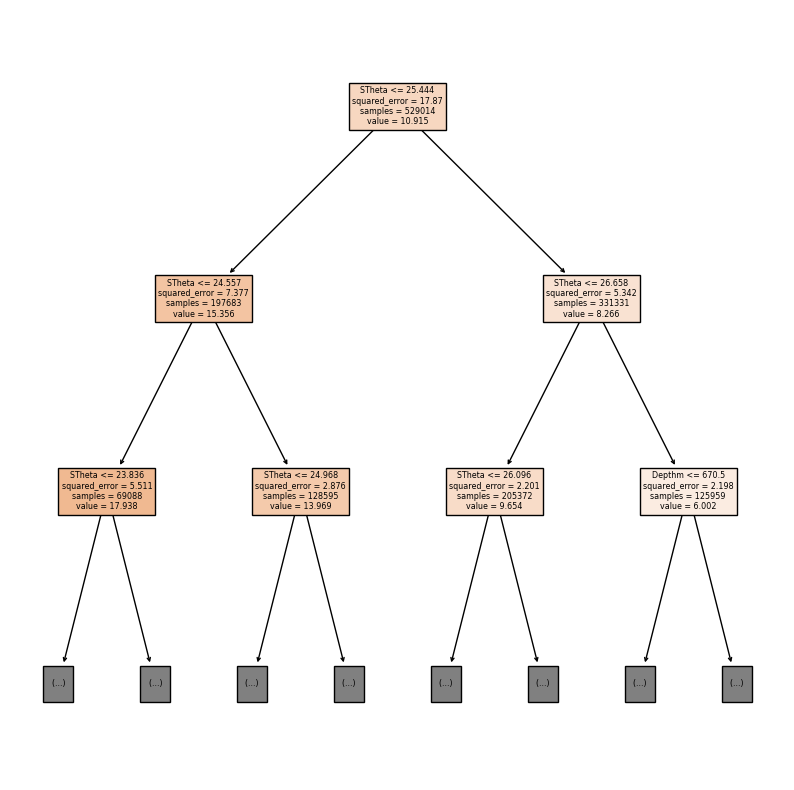

In [49]:
plt.figure(figsize = (10, 10))
# plot decision tree depth = 2
tree.plot_tree(model_tree, feature_names = features, filled = True, max_depth = 2)

#### Regression Tree Error

In [50]:
mse_tree = mean_squared_error(y_test, predictions)
RMSE_tree = mse_tree**(1/2)
print('RMSE_tree: ', RMSE_tree)

RMSE_tree:  0.18035450438720613


## KNN

In [53]:
k = 100

model = KNeighborsRegressor(n_neighbors = k)
print(model)

model.fit(X_train, y_train)
pred_y = model.predict(X_test)

KNeighborsRegressor(n_neighbors=100)


#### KNN Error

In [54]:
print(model)
mse_knn = mean_squared_error(y_test, pred_y)
RMSE_knn = mse_knn**(1/2)
print('RMSE_KNN: ', RMSE_knn)

KNeighborsRegressor(n_neighbors=100)
RMSE_KNN:  1.3157370402918163


*Worse than multilinear regressor and decision tree regressor*

## Feature Importance Analysis

*We can get a feature importance analysis through the decision tree model used above.*

In [56]:
for i,feature in enumerate(features):
    print('',feature,'=', model_tree.feature_importances_[i])

 Cst_Cnt = 8.900949273136779e-06
 Depthm = 0.019813619791390038
 Salnty = 0.06121591882241488
 O2ml_L = 4.917424923116928e-05
 STheta = 0.9189123861876907
